<a href="https://colab.research.google.com/github/Vahideh115/Exercises/blob/main/ML_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  اتصال به گوگل درایو
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# خواندن داده های فایل csv :مرحله یک
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_cars.csv')

# مرحله دو-یک: بررسی اولیه مقادیر

print(f'Head of DataFrame:\n{df.head()}')
print(f'\nShape of DataFrame:{df.shape}')
print(f'\nType of DataFrame:\n{df.dtypes}')
print(f'\nDescribe of DataFrame:\n{df.describe()}')

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
Head of DataFrame:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   Fi

In [ ]:
## مرحله دو-دو: بررسی اولیه مقادیر

print(f'Sum of Duplicated:{df.duplicated().sum()}\n')
print(f'Sum of Nulls:\n{df.isnull().sum()}\n')

Sum of Duplicated:1202

Sum of Nulls:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64



In [ ]:
#    مرحله سوم: حذف ردیف های تکراری و ستون های غیرضروری
df.drop_duplicates(inplace=True)
print(f'Sum of Duplicated after drop:{df.duplicated().sum()}')
print(100*'*')
unnessury_cols=['name','torque']
for col in unnessury_cols:
  if col in df.columns:
    df.drop(columns=col,inplace=True)
print(f'Head of DataFrame after drop unnecessary columns:\n{df.head()}')
print(f'\nShape of DataFrame after drop unnecessary columns:{df.shape}')

Sum of Duplicated after drop:0
****************************************************************************************************
Head of DataFrame after drop unnecessary columns:
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner     mileage   engine   max_power  seats  
0   First Owner   23.4 kmpl  1248 CC      74 bhp    5.0  
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp    5.0  
2   Third Owner   17.7 kmpl  1497 CC      78 bhp    5.0  
3   First Owner   23.0 kmpl  1396 CC      90 bhp    5.0  
4   First Owner   16.1 kmpl  1298 CC    88.2 bhp    5.0  

Shape of DataFrame after drop unnecessary column

In [ ]:
# مرحله چهارم تبدیل ستونهای متنی به عددی

df['mileage']=df['mileage'].str.replace(' kmpl','',regex=False)
df['mileage']=df['mileage'].str.replace(' km/kg','',regex=False)
df['mileage']=pd.to_numeric(df['mileage'],errors='coerce')

df['engine']=df['engine'].str.replace(' CC','',regex=False)
df['engine']=pd.to_numeric(df['engine'],errors='coerce')

df['max_power']=df['max_power'].str.replace(' bhp','',regex=False)
df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')

print(f'Head of DataFrame after convert:\n{df.head()}')
print(f'\nShape of DataFrame after convert:{df.shape}')

Head of DataFrame after convert:
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40  1248.0      74.00    5.0  
1  Second Owner    21.14  1498.0     103.52    5.0  
2   Third Owner    17.70  1497.0      78.00    5.0  
3   First Owner    23.00  1396.0      90.00    5.0  
4   First Owner    16.10  1298.0      88.20    5.0  

Shape of DataFrame after convert:(6926, 11)


In [ ]:
# مرحله پنجم: پرکردن مقادیر گمشده با میانگین یا میانه

df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())
df['max_power']=df['max_power'].fillna(df['max_power'].mean())
df['seats']=df['seats'].fillna(df['seats'].median())


print(f'Sum of Nulls after FillNaN:\n{df.isnull().sum()}\n')
print(f'Head of DataFrame after FillNaN:\n{df.head()}')
print(f'\nShape of DataFrame after FillNaN:{df.shape}')


Sum of Nulls after FillNaN:
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Head of DataFrame after FillNaN:
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40  1248.0      74.00    5.0  
1  Second Owner    21.14  1498.0     103.52    5.0  
2   Third Owner    17.70  1497.0      78.00    5.0  
3   First Owner    23.00  1396.0      90.00    5.0  
4   First Owner    16.10  1298

In [ ]:
# مرحله ششم: رمزنگاری ستون های متنی

import pandas as pd

categorical_cols=['fuel','seller_type','transmission','owner']
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
print(f'Head of encoded DataFrame:\n{df_encoded.head()}')
print(f'Shape of encoded DataFrame:\n{df_encoded.shape}')

Head of encoded DataFrame:
   year  selling_price  km_driven  mileage  engine  max_power  seats  \
0  2014         450000     145500    23.40  1248.0      74.00    5.0   
1  2014         370000     120000    21.14  1498.0     103.52    5.0   
2  2006         158000     140000    17.70  1497.0      78.00    5.0   
3  2010         225000     127000    23.00  1396.0      90.00    5.0   
4  2007         130000     120000    16.10  1298.0      88.20    5.0   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0         True     False        False                    True   
1         True     False        False                    True   
2        False     False         True                    True   
3         True     False        False                    True   
4        False     False         True                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False                 True   
1                         False      

In [ ]:
# مرحله هفتم: نرمال سازی ویژگی های عددی

from sklearn.preprocessing import StandardScaler
numeric_cols=['year','km_driven','mileage','engine','max_power','seats']
scaler=StandardScaler()
df_encoded[numeric_cols]=scaler.fit_transform(df_encoded[numeric_cols])
print(f'Head of standard DataFrame:\n{df_encoded.head()}')

Head of standard DataFrame:
       year  selling_price  km_driven   mileage    engine  max_power   seats  \
0  0.142153         450000   1.225357  0.986734 -0.376327  -0.438655 -0.4337   
1  0.142153         370000   0.788368  0.419976  0.138086   0.504680 -0.4337   
2 -1.819597         158000   1.131104 -0.442701  0.136029  -0.310831 -0.4337   
3 -0.838722         225000   0.908326  0.886423 -0.071794   0.072638 -0.4337   
4 -1.574378         130000   0.788368 -0.843946 -0.273444   0.015118 -0.4337   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0         True     False        False                    True   
1         True     False        False                    True   
2        False     False         True                    True   
3         True     False        False                    True   
4        False     False         True                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False             

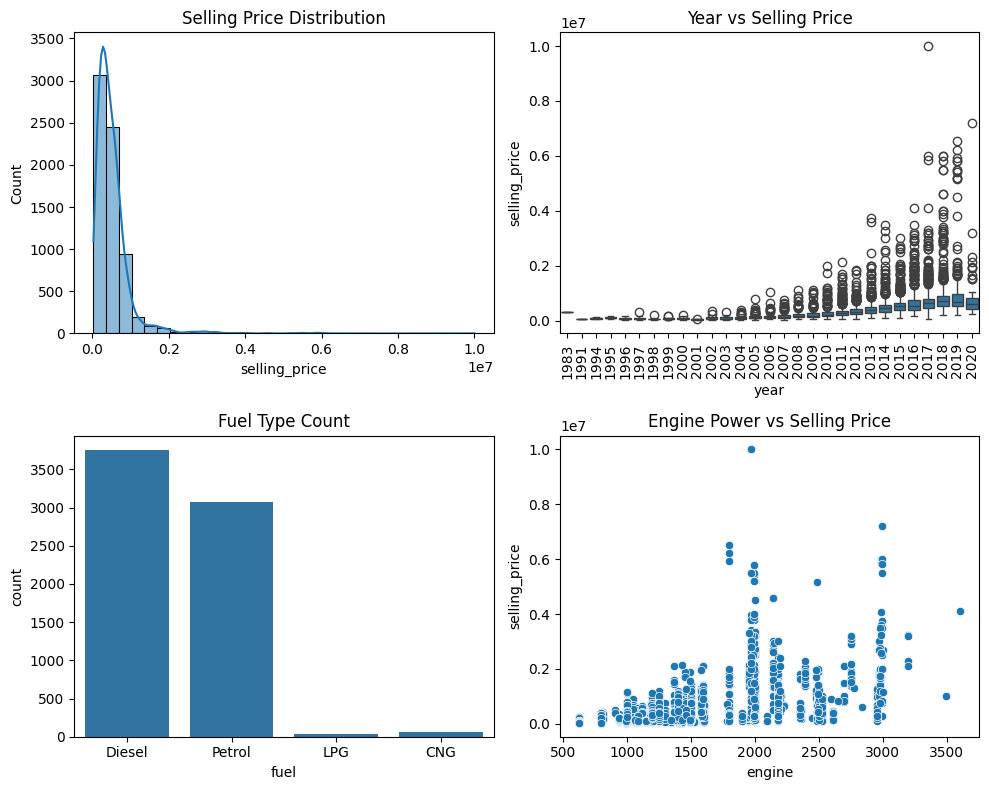

In [ ]:
# مرحله هشتم: مصورسازی داده ها

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

# توزیع قیمت فروش
plt.subplot(2,2,1)
sns.histplot(df['selling_price'],bins=30,kde=True)
plt.title('Selling Price Distribution')

#رابطه سال تولید با قیمت فروش
plt.subplot(2,2,2)
sns.boxplot(x='year',y='selling_price',data=df)
plt.xticks(rotation=90)
plt.title('Year vs Selling Price')

#تعداد خودروها براساس نوع سوخت
plt.subplot(2,2,3)
sns.countplot(x='fuel',data=df)
plt.title('Fuel Type Count')

#قدرت موتور در برابر قیمت فروش
plt.subplot(2,2,4)
sns.scatterplot(x='engine',y='selling_price',data=df)
plt.title('Engine Power vs Selling Price')

plt.tight_layout()
plt.show()

In [ ]:

#  اعمال مدل رگرسیون خطی برروی داده های آموزشی

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# رگرسیون تک متغیره

X_single=df_encoded[['km_driven']]
y_single=df_encoded['selling_price']
X_train,X_test,y_train,y_test=train_test_split(X_single,y_single,test_size=0.2,random_state=42)

model_single=LinearRegression()
model_single.fit(X_train,y_train)
y_pred_single=model_single.predict(X_test)
mse_single=mean_squared_error(y_test,y_pred_single)
r2_single=r2_score(y_test,y_pred_single)
print(f'Mean Squared Error (Single Variable):{mse_single}')
print(f'R-squared (Single Variable):{r2_single}')

# رگرسیون چند متغیره

X_multi=df_encoded.drop('selling_price',axis=1)
y_multi=df_encoded['selling_price']
X_multi_encoded=pd.get_dummies(X_multi,drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X_multi_encoded,y_multi,test_size=0.2,random_state=42)

model_multi=LinearRegression()
model_multi.fit(X_train,y_train)
y_pred_multi=model_multi.predict(X_test)
mse_multi=mean_squared_error(y_test,y_pred_multi)
r2_multi=r2_score(y_test,y_pred_multi)
print(60*'*')
print(f'Mean Squared Error (Multiple Variables):{mse_multi}')
print(f'R-squared (Multiple Variables):{r2_multi}')


Mean Squared Error (Single Variable):223543537298.92032
R-squared (Single Variable):-0.019249853952878038
************************************************************
Mean Squared Error (Multiple Variables):99151096627.94266
R-squared (Multiple Variables):0.5479192018771623


In [ ]:
# اعمال مدل رگرسیون چند جمله ای تک متغیره

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X_poly=df_encoded[['km_driven']]
y_poly=df_encoded['selling_price']

poly=PolynomialFeatures(degree=3)
X_poly_transformed=poly.fit_transform(X_poly)

X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(X_poly_transformed,y_poly,test_size=0.2,random_state=42)

model_poly=LinearRegression()
model_poly.fit(X_train_poly,y_train_poly)
y_pred_poly=model_poly.predict(X_test_poly)
mse_poly=mean_squared_error(y_test_poly,y_pred_poly)
r2_poly=r2_score(y_test_poly,y_pred_poly)
print(f'Mean Squared Error (Polynomial Regression):{mse_poly}')
print(f'R-squared (Polynomial Regression):{r2_poly}')

Mean Squared Error (Polynomial Regression):998087955339.2782
R-squared (Polynomial Regression):-3.5507958539251376


In [ ]:
#اعمال مدل رگرسیون چند جمله ای چند متغیره

X_num=df_encoded[['year','km_driven','mileage','engine','max_power','seats']]
y_num=df_encoded['selling_price']

poly_multi=PolynomialFeatures(degree=2,include_bias=False)
X_num_transformed=poly_multi.fit_transform(X_num)

X_train_num,X_test_num,y_train_num,y_test_num=train_test_split(X_num_transformed,y_num,test_size=0.2,random_state=42)
model_poly_multi=LinearRegression()
model_poly_multi.fit(X_train_num,y_train_num)
y_pred_poly_multi=model_poly_multi.predict(X_test_num)

mse_poly_multi=mean_squared_error(y_test_num,y_pred_poly_multi)
r2_poly_multi=r2_score(y_test_num,y_pred_poly_multi)

print(f'Mean Squared Error (Polynomial Regression with Multiple Variables):{mse_poly_multi}')
print(f'R-squared (Polynomial Regression with Multiple Variables):{r2_poly_multi}')

Mean Squared Error (Polynomial Regression with Multiple Variables):54589333366.01093
R-squared (Polynomial Regression with Multiple Variables):0.7510991785627419


In [ ]:
# اعمال مدل رگرسیون با استفاده از روش تنظیم همبستگی

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(max_iter=10000), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    'ElasticNet': (ElasticNet(max_iter=10000), {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]})
}

results = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='r2')
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    results[name] = {
        'Best Params': grid.best_params_,
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")


Model: Ridge
Best Params: {'alpha': 100}
R2 Score: 0.5492
RMSE: 314437.88

Model: Lasso
Best Params: {'alpha': 100}
R2 Score: 0.5481
RMSE: 314822.70

Model: ElasticNet
Best Params: {'alpha': 0.1, 'l1_ratio': 0.5}
R2 Score: 0.5509
RMSE: 313844.58


Ridge: Mean R² = 0.6401, Std = 0.0426
Lasso: Mean R² = 0.6396, Std = 0.0436
ElasticNet: Mean R² = 0.6401, Std = 0.0416


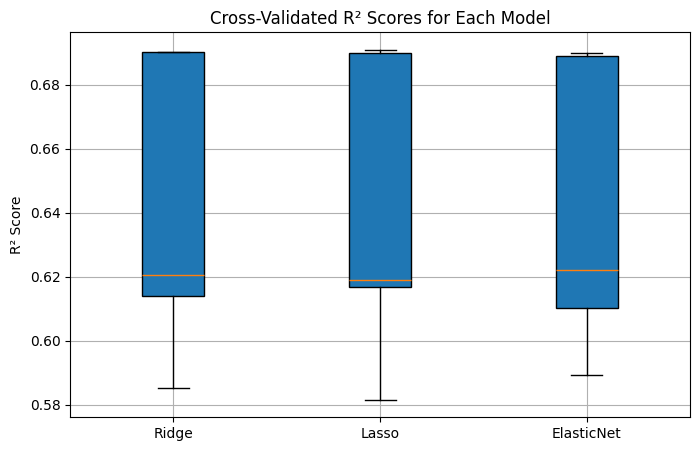

In [64]:
# ارزیابی بهتر عملکرد مدل ها

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np
import matplotlib.pyplot as plt

# تعریف مدل‌ها با بهترین پارامترهای به‌دست‌آمده قبلی
best_models = {
    'Ridge': Ridge(alpha=results['Ridge']['Best Params']['alpha']),
    'Lasso': Lasso(alpha=results['Lasso']['Best Params']['alpha'], max_iter=10000),
    'ElasticNet': ElasticNet(
        alpha=results['ElasticNet']['Best Params']['alpha'],
        l1_ratio=results['ElasticNet']['Best Params']['l1_ratio'],
        max_iter=10000
    )
}

# اجرای Cross Validation و ذخیره نتایج
cv_scores = {}
for name, model in best_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores[name] = scores
    print(f"{name}: Mean R² = {scores.mean():.4f}, Std = {scores.std():.4f}")

# رسم نمودار جعبه‌ای (Boxplot)
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(cv_scores.values(), tick_labels=cv_scores.keys(), patch_artist=True)
ax.set_title("Cross-Validated R² Scores for Each Model")
ax.set_ylabel("R² Score")
plt.grid(True)
plt.show()